Epoch 1/100


c:\Users\anala\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0374 - val_loss: 0.0332
Epoch 2/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0220 - val_loss: 0.0118
Epoch 3/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0203 - val_loss: 0.0091
Epoch 4/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0253 - val_loss: 0.0109
Epoch 5/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0224 - val_loss: 0.0103
Epoch 6/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0217 - val_loss: 0.0105
Epoch 7/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0207 - val_loss: 0.0113
Epoch 8/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0240 - val_loss: 0.0098
Epoch 9/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0197 - val_loss: 0.0116
Epoch 10/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0206 - val_loss: 0.0155
Epoch 11/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0211 - val_loss: 0.0087
Epoch 12/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/ste

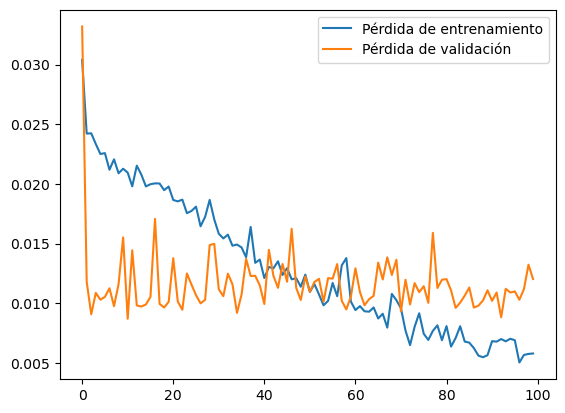

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


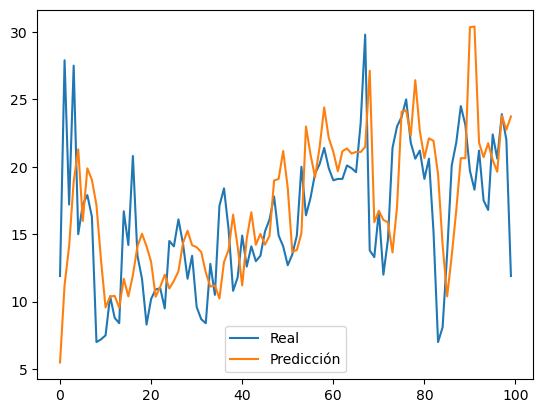

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

# Leer datos
df = pd.read_csv('data_boston.csv', header='infer', encoding='latin1')
df = df[['PRICE']]

# Escalar los datos
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)

# Crear secuencias
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(ts_scaled, seq_length)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Parámetros
batch_size = 1
n_epochs = 100
learn_rate = 0.001

# Modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.SimpleRNN(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilación
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate), loss='mse')

# Entrenamiento
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()

# Predicción
y_pred = model.predict(X_test)

# Desescalar valores
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Graficar resultados
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='Predicción')
plt.legend()
plt.show()
